<a href="https://colab.research.google.com/github/BurakCifci/Machine-Learning-CPE312/blob/main/Machine_Learning_CPE312_WEEK_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#K-MEANS TUTORİAL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% create dataset

# class1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

In [2]:
x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

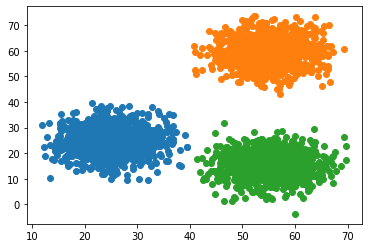

In [4]:
dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

#herhangi bir renk girmediğimiz için kendisi atıyor


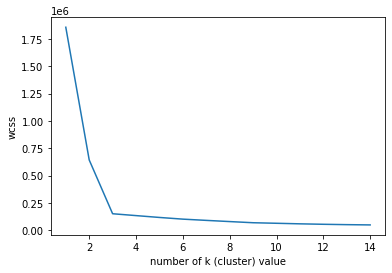

In [5]:
# %% KMEANS

from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

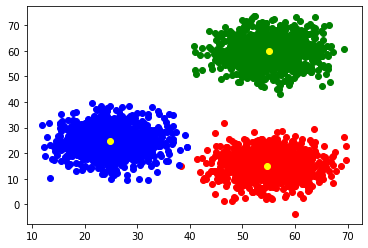

In [6]:
#%% k = 3 icin modelim

kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")
plt.show()

In [ ]:
#PCA-1

In [7]:
from sklearn.datasets import load_iris
import pandas as pd

# %%
iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y = iris.target

df = pd.DataFrame(data,columns = feature_names)
df["sinif"] = y

x = data

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten= True )  # whitten = normalize
pca.fit(x)

x_pca = pca.transform(x)

print("variance ratio: ", pca.explained_variance_ratio_)

print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.92461872 0.05306648]
sum:  0.977685206318795


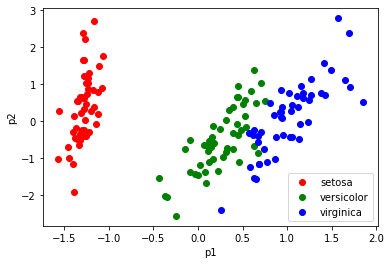

In [9]:
df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red","green","blue"]

import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(df.p1[df.sinif == each],df.p2[df.sinif == each],color = color[each],label = iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

In [ ]:
#PCA-2

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [22]:
# loading dataset into Pandas DataFrame
df = pd.read_csv("/content/Iris.csv", names=['sepal length','sepal width','petal length','petal width','target'])

In [23]:
df.head()

,sepal length,sepal width,petal length,petal width,target
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
